# Import Packages and Definitions

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import collections as col
import statistics
from scipy.interpolate import UnivariateSpline
import glob

In [15]:
fulldatatype=([('pulse','i8'),('frequency','i8'),('phase','i8'),('intensity','f8')])

# Do for One Frequency

In [16]:
pulse = np.loadtxt(fname='/home/lisasmith/20U3_B1944+17/Parkes_archive_files/pulse750-F.pdv', dtype=fulldatatype)
f = open('/home/lisasmith/20U3_B1944+17/Parkes_archive_files/pulse750-F.pdv')
header = f.readline()
f.close()

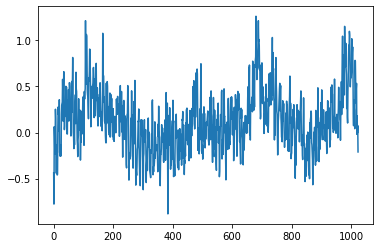

In [17]:
f = pulse['frequency'] == 0
x=pulse['phase'][f]
y=pulse['intensity'][f]

plt.plot(x,y)

In [18]:
SF=1024/0.44

In [19]:
SF

2327.2727272727275

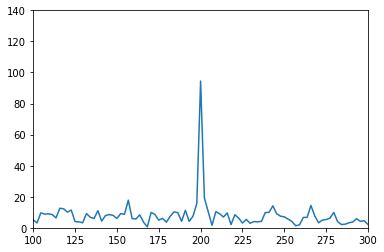

In [25]:
fft=np.fft.rfft(y)
ffta=abs(fft)

values=np.arange(int(len(fft)))
values=values/1024

freq=values*SF

plt.plot(freq,ffta)
plt.axis([100,300,0,140])
plt.show()

In [13]:
len(fft)

513

In [82]:
val = max(ffta[50:100])
val2 = max(ffta[250:500])
index = np.where(ffta==val)
index2 = np.where(ffta==val2)
print(val, val2,index,index2)
fre=index[0]/1024*SF
fre2=index2[0]/1024*SF
print(fre,fre2)

94.45940901865778 32.66289061125467 (array([88]),) (array([264]),)
[200.] [600.]


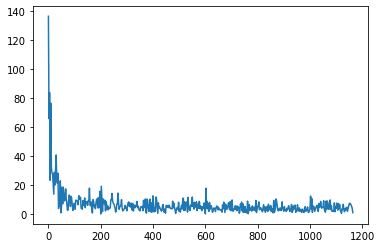

In [83]:
fft[index[0]]=0
fft[index2[0]]=0

plt.plot(freq,abs(fft))

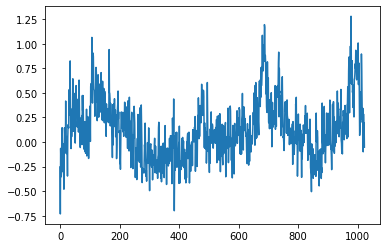

In [84]:
newy=np.fft.irfft(fft)

plt.plot(x,newy)

In [85]:
pulse['intensity'][f]=newy

In [86]:
pulse

array([(0, 0,    0, -0.25385713), (0, 0,    1, -0.73167731),
       (0, 0,    2, -0.06443034), ..., (0, 0, 1021,  0.148924  ),
       (0, 0, 1022,  0.19418486), (0, 0, 1023, -0.0527572 )],
      dtype=[('pulse', '<i8'), ('frequency', '<i8'), ('phase', '<i8'), ('intensity', '<f8')])

In [88]:
np.savetxt('/home/lisasmith/20U3_B1944+17/Parkes_archive_files/test.pdv'+'.RFIR', pulse, delimiter=" ", header=header[2:-1], fmt=['%d','%d','%d','%0.6f'])

In [89]:
path='/home/lisasmith/20U3_B1944+17/Parkes_archive_files/*'
file_names=glob.glob(path)

In [92]:
print(file_names[0]+'.RFIR')

/home/lisasmith/20U3_B1944+17/Parkes_archive_files/pulse750-F.pdv.RFIR


In [91]:
file_names

['/home/lisasmith/20U3_B1944+17/Parkes_archive_files/pulse750-F.pdv',
 '/home/lisasmith/20U3_B1944+17/Parkes_archive_files/pulse750-p.pdv',
 '/home/lisasmith/20U3_B1944+17/Parkes_archive_files/B1944-2600s-T-f32-pazi.ar',
 '/home/lisasmith/20U3_B1944+17/Parkes_archive_files/B1944-2600s-T-f256.ar',
 '/home/lisasmith/20U3_B1944+17/Parkes_archive_files/B1944-2600s-f32.ar',
 '/home/lisasmith/20U3_B1944+17/Parkes_archive_files/B1944-2600s-T-f32.ar',
 '/home/lisasmith/20U3_B1944+17/Parkes_archive_files/B1944+17.png',
 '/home/lisasmith/20U3_B1944+17/Parkes_archive_files/B1944-2600s-T-f32.pdv',
 '/home/lisasmith/20U3_B1944+17/Parkes_archive_files/2600s',
 '/home/lisasmith/20U3_B1944+17/Parkes_archive_files/B1944-2600s-T-f256-pazi.pdv',
 '/home/lisasmith/20U3_B1944+17/Parkes_archive_files/B1944-2600s-T-f256-pazi.ar',
 '/home/lisasmith/20U3_B1944+17/Parkes_archive_files/B1944-2600s-f32-pazi.ar',
 '/home/lisasmith/20U3_B1944+17/Parkes_archive_files/B1944-2600s-T-f32-pazi.pdv',
 '/home/lisasmith/20

# Loop Over All Frequencies